## <span style="color:blue">Code groups</span>

Identification codes are predominately from EU Marine Strategy Framework Directive (MSFD) Masterlist. Codes were added for this project to increase the identification of items commonly found in Swiss freshwater systems. For the complete list visit:
[mcc.jrc.ec.europa.eu › documents](https://mcc.jrc.ec.europa.eu/documents/201702074014.pdf) 
Annex 8.1 - Master List of Categories of Litter Items. 
[https://www.hammerdirt.ch/ ](https://www.hammerdirt.ch/) 
Documents: Additional Codes for Swiss Waterways

Impactful litter reduction strategies should target the source of material. The simplest way to describe litter pollution is whether it is direct or indirect. Direct relates to individual comportment on our near Swiss shorelines. Impactful litter reduction strategies should target items regularly discarded by beach goers such as; additional trash recepticles, sensibilazation techniques, or as in Milan, Italy the banning smoking around lake shores and other public spaces. Cigarette butt remains one of the most common single use plastic item discarded directly in the water, on the shoreline or in very close proximity.

Indirect refers to material that is likely transported to sites by aeolian and especially fluvial systems; rivers, streams, canals, and drainage systems. These items likely represent a systematic loss where material is escaping pollution management practices. Reduction strategies may be upgrading waste water treatment facility to reduce plastic material loss. Media filters are a common item escaping directly from the facilities as well as toilet flushed single use plastic items related to personal hygiene. Media filters and cotton swab sticks have been identified along the shores of all Swiss lakes of study. Industrial plastic pre-preduction pellets are escaping from improper transport or directly from plastic injection manufactures. Targeted sensibilization at Swiss facilities may reduce loss. 
Increased enforcement of existing regulations should be considered in reducing both indirect and direct sources of material. 
## <span style="color:blue">Simplified code groupings </span>

1. Direct: items likely abandoned on or near survey site includes the following groups:
- food/drink
- tobacco
- recreation
- personal items
- packaging non food/drink

2. Indirect: items likely transported to survey site via aeolian, fluvial and or lacustrine processes includes the following groups:
- wastewater  
- micro plastics (< 5mm)
- infrastructure 
- agriculture
- plastic pieces

3. unclassified: item codes not grouped 

### <span style="color:#008891">Lists of items grouped by use and/or industry for analysis </span>

Group 2 contains the following use catagories:
1. wastewater: items released from water treatment plants includes items likely toilet flushed   
2. micro plastics (< 5mm): fragmented plastic items and pre-production plastic resins
3. infrastructure: items related to construction and maintenance of all buildings, roads and water/power supplies 
4. food/drink: primarily single use plastic items related to consuming food and drinks outdoors  
5. agriculture: primarily industrial sheeting includes: mulch and fumigation films, row coverings, and bale wraps as well as plastic items such as fencing and pheromone baits 
6. tobacco: primarily cigarette filters includes all smoking related material 
7. recreation: includes fishing, hunting, boating and beach related objects, excludes food, drink and tobacco   
8. packaging non food/drink: packaging or wrapping material not identifiable as food, drink nor tobacco related  
9. plastic pieces: foam and plastic fragments of indeterminate origin and use 
10. personal items: accessories, hygiene and clothing related
11. Unclassified: ungrouped item codes

## <span style="color:blue">Item identification </span>

__What this does:__ This note book has codes gouped by industry or use. The grouping is not finite and individual codes maybe added or removed. Individual codes have been grouped to best describe item usage and possible sources. The grouping is derived from field observations and research to answer fundemental questions:

1. what is the item

2. how is the item used

3. where did the item come from

__When to use it:__ May be used to analyze a series of coded items related by use, source and with other important variables:

1. population densities

2. infrastructure densities

3. waterway concentrations

4. seasonality

5. regional differences

6. previous and/or other current data



#### Tasks:add photos, sources

In [1]:
# sys, file and nav packages:
import os
import datetime as dt
import csv, json

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt 


# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
import seaborn as sns
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML


# home brew utitilties
import resources.utility_functions as ut
def push_this_to_json(filename="", data=[]):
    with open(filename, "w") as a_file:
        json.dump(data, a_file)

# documenting
from IPython.display import Markdown as md

def make_table_grids(anax):
    anax.grid(False)
    anax.spines["top"].set_visible(False)
    anax.spines["right"].set_visible(False)
    anax.spines["bottom"].set_visible(False)
    anax.spines["left"].set_visible(False)
    return(anax)
def table_fonts(a_table, size=12):
    a_table.auto_set_font_size(False)
    a_table.set_fontsize(size)
    
# method to save
files_generated=[]
def add_output(a_name, a_tag, atype="table", fignum=0, a_list=files_generated):
    tableonefile = F"{project_directory}/{a_name}"
    files_generated.append({'tag':a_tag, 'number':fignum, 'file':tableonefile,'type':atype})
    plt.savefig(tableonefile, dpi=300)


    
# table kwargs
table_k = dict(loc="top left", bbox=(0,0,1,1), colWidths=[.5, .5], cellLoc='center')
tablecenter_k = dict(loc="top left", bbox=(0,0,1,1), cellLoc='center')
tabtickp_k = dict(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
title_k = {'loc':'left', 'pad':12, 'linespacing':1.5, 'fontsize':12}
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

table_num = 1

In [2]:
# the local file structure. The resources are located in the corresponding directory.
# the purpose and date should be included in the filename when saving results to output
# most_recent, survey_data, location_data, code_defs, stat_ent, geo_data, output = ut.make_local_paths()

In [3]:
# probably want to keep these... the works already done
# aggregated survey data
dfAgg = pd.read_csv("resources/results_with_land_use_2015.csv")
dfAgg['date'] = pd.to_datetime(dfAgg['date'])


# get your data:
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")

# beach data
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")

# code definitions

today = dt.datetime.now().date().strftime("%Y-%m-%d")

In [4]:
output = "output"
project_directory = ut.make_project_folder(output, 'code_groups')

### <span style="color:#008891">Simplified Grouping 1 </span>
1. items likely abandoned on or near site includes the following groups:
- food/drink
- tobacco
- recreation
- personal items
- packaging non food/drink

In [5]:
# kwargs for the abundance class
on_site = {
    "food and drink":"foodstuff.json",
    "tobacco":"tobac.json",
    "recreation":"recreation.json",    
    "packaging non food":"packaging.json",
    "personal items":"pi.json"    
}
# saving to .json
push_this_to_json(filename=F"{project_directory}/on_site", data=on_site)
# groups.append({"on_site":on_site})

In [6]:
# kwargs for the abundance class
transported = {
    "waste water": "wastewater.json" ,
    "micro plastics (< 5mm)":"codeListMicros.json",
    "infrastructure":"construction2.json",
    "agriculture":"ag2.json",
    "plastic pieces":"plasticpcs.json",
    
}
# saving to .json
push_this_to_json(filename=F"{project_directory}/transported", data=transported)
# groups.append({"transported":transported})

### <span style="color:#008891">Code groups</span>
Individual item codes have been grouped to best describe usage and possible sources. It is acknowledged that some items in a group contribute to a percentage rather than the whole sum.  Determining the origin of ubiquitous material would require considerable investment into material analysis, which may be inconclusive, or material loss investigations at the sites of relevant industry sectors. Code grouping is a broad analysis method to evaluate the discarded materials found in water systems by economic sectors or physical properties. Items are also analysed independently in this report.

In [7]:
# kwargs for the abundance class
code_group2 = {
    "waste water": "wastewater.json" ,
    "micro plastics (< 5mm)":"codeListMicros.json",
    "infrastructure":"construction2.json",
    "food and drink":"foodstuff.json",
    "agriculture":"ag2.json",
    "tobacco":"tobac.json",
    "plastic pieces":"plasticpcs.json",
    "recreation":"recreation.json",    
    "packaging non food":"packaging.json",
    "personal items":"pi.json", 
    "unclassified": "nogroup.json"
}
# saving to .json
push_this_to_json(filename=F"{project_directory}/code_group2.json", data=code_group2)
# groups.append({"code_group2":code_group2})

### <span style="color:#008891">Micro codes</span>

Micro codes are all micro plastics and foams from MSFD Master List of Categories of Litter Items Annex 8.1 items G103-G123. Not all codes have been identified in our data.
The objective of this project was to quantify observable litter which tends to be greater than 0.5 cm but the lower limit of natural visible detection when surveying a shore line is around 0.2 - 0.5 cm. Over the course of a survey, visible micro items are collected with the lager material and composition is generally identifiable. The IQAOALSW project did not include methods to specifically target items less than 5mm but all visible micro plastics collected during a survey were quantified, weighed and categorized using 20 codes (G103 - G123) available to classify plastics less than 5mm.

In [8]:
grouped = []
groups = {}

In [9]:
codesmicro=["G112", "G106", "G117", "G103", "G104", "G105", "G107", "G108", "G109", "G110", "G111", "G113", "G114", "G115", "G116", "G118", "G119", "G120", "G121", "G122", "G123"]
push_this_to_json(filename=F"{project_directory}/codeListMicros.json", data=codesmicro)
grouped = grouped + codesmicro
groups.update({x:'micro' for x in codesmicro})

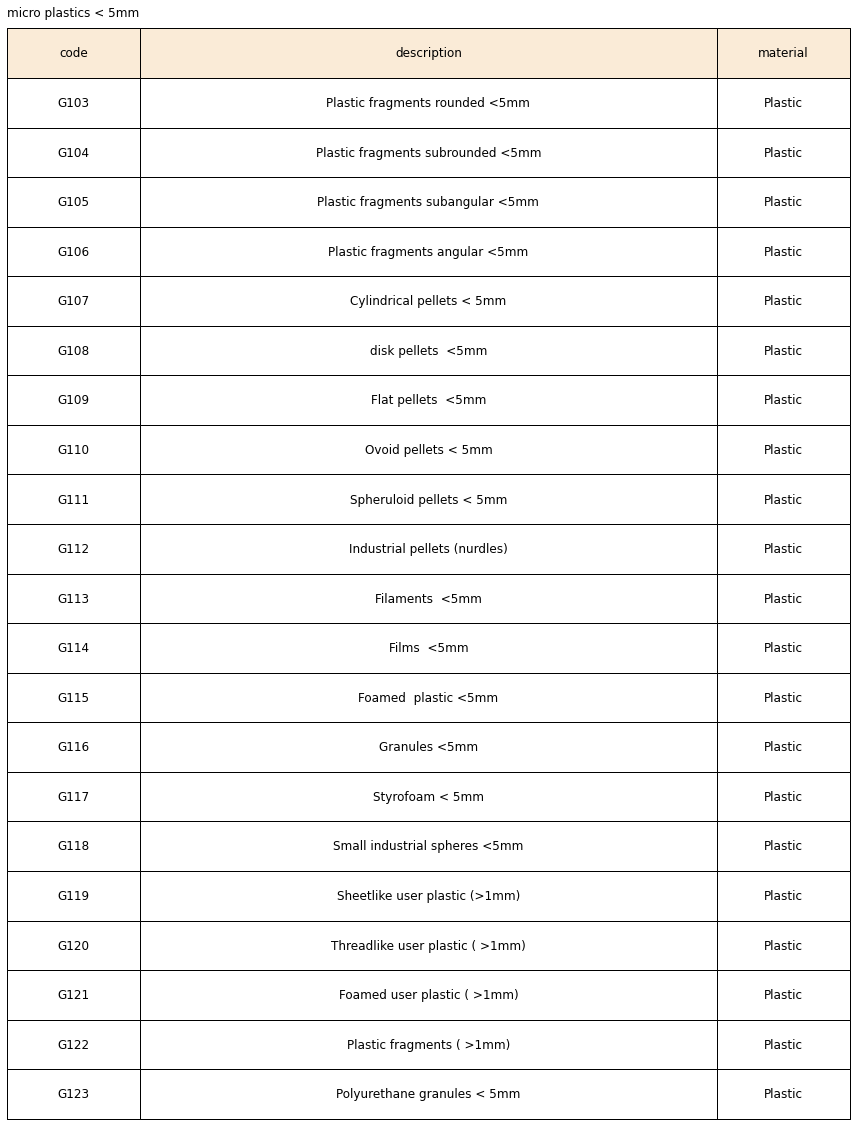

In [10]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(codesmicro)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
# ax.set_title(F"Table {table_num}: micro plastics < 5mm", **title_k)
ax.set_title(F"micro plastics < 5mm", **title_k)

plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Micro codes are all micro plastics and foams"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Wastewater treatment codes</span>
Wastewater treatment codes includes items that may have been toilet flushed and released from a water treatment bypass or inadequate filtering for items such as cotton swabs. Note code G98 includes diapers and wipes. Diapers are rarely found in Swiss water systems the quantities should be attributed to personal hygiene wipes. 

In [11]:

wastewater = [
    'G91',
    'G95',
    'G96',
    'G98',
    'G97',
    'G100',
    'G133',
    'G932',
    'G144'
]
# saving to .json
push_this_to_json(filename=F"{project_directory}/wastewater.json", data=wastewater)
grouped = grouped + wastewater

groups.update({x:'waste_water' for x in wastewater})

In [12]:
wwcodes = dfCodes[dfCodes.code.isin(wastewater)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

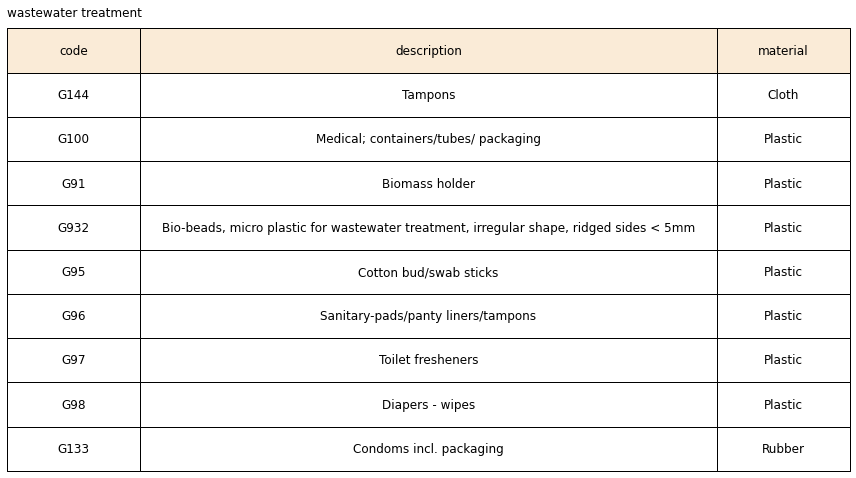

In [13]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(wastewater)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"wastewater treatment", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items specific to wastewater treatment"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Recreation codes</span>
The recreational group includes fishing, hunting, boating and beach related objects, excludes food, drink and tobacco. Plastic shotgun cartridges (G70) are found in surprising numbers considering hunting is not allowed along public beaches and maybe a key indicator of travel distances through the water systems.

In [14]:
recreation = [
    'G32',
    'G43',
    'G48',
    'G49',
    'G50',
    'G49',
    'G51',
    'G52',
    'G53',
    'G54',
    'G53',
    'G55',
    'G56',
    'G57',
    'G58',
    'G59',
    'G60',
    'G61',
    'G63',
    'G70',
    'G73',
    'G86',
    'G92',
    'G94',
    'G206',
    'G132',
    'G142',
    'G143',
    'G155',
    'G164',
    'G167',
    'G182',
    'G183',
    'G125',
    'G126',
    'G11',
    'G213',
    'G904',
    'G940'
  ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/recreation.json", data=recreation)
grouped = grouped + recreation
# groups.append({"recre":recreation})
groups.update({x:'recre' for x in recreation})


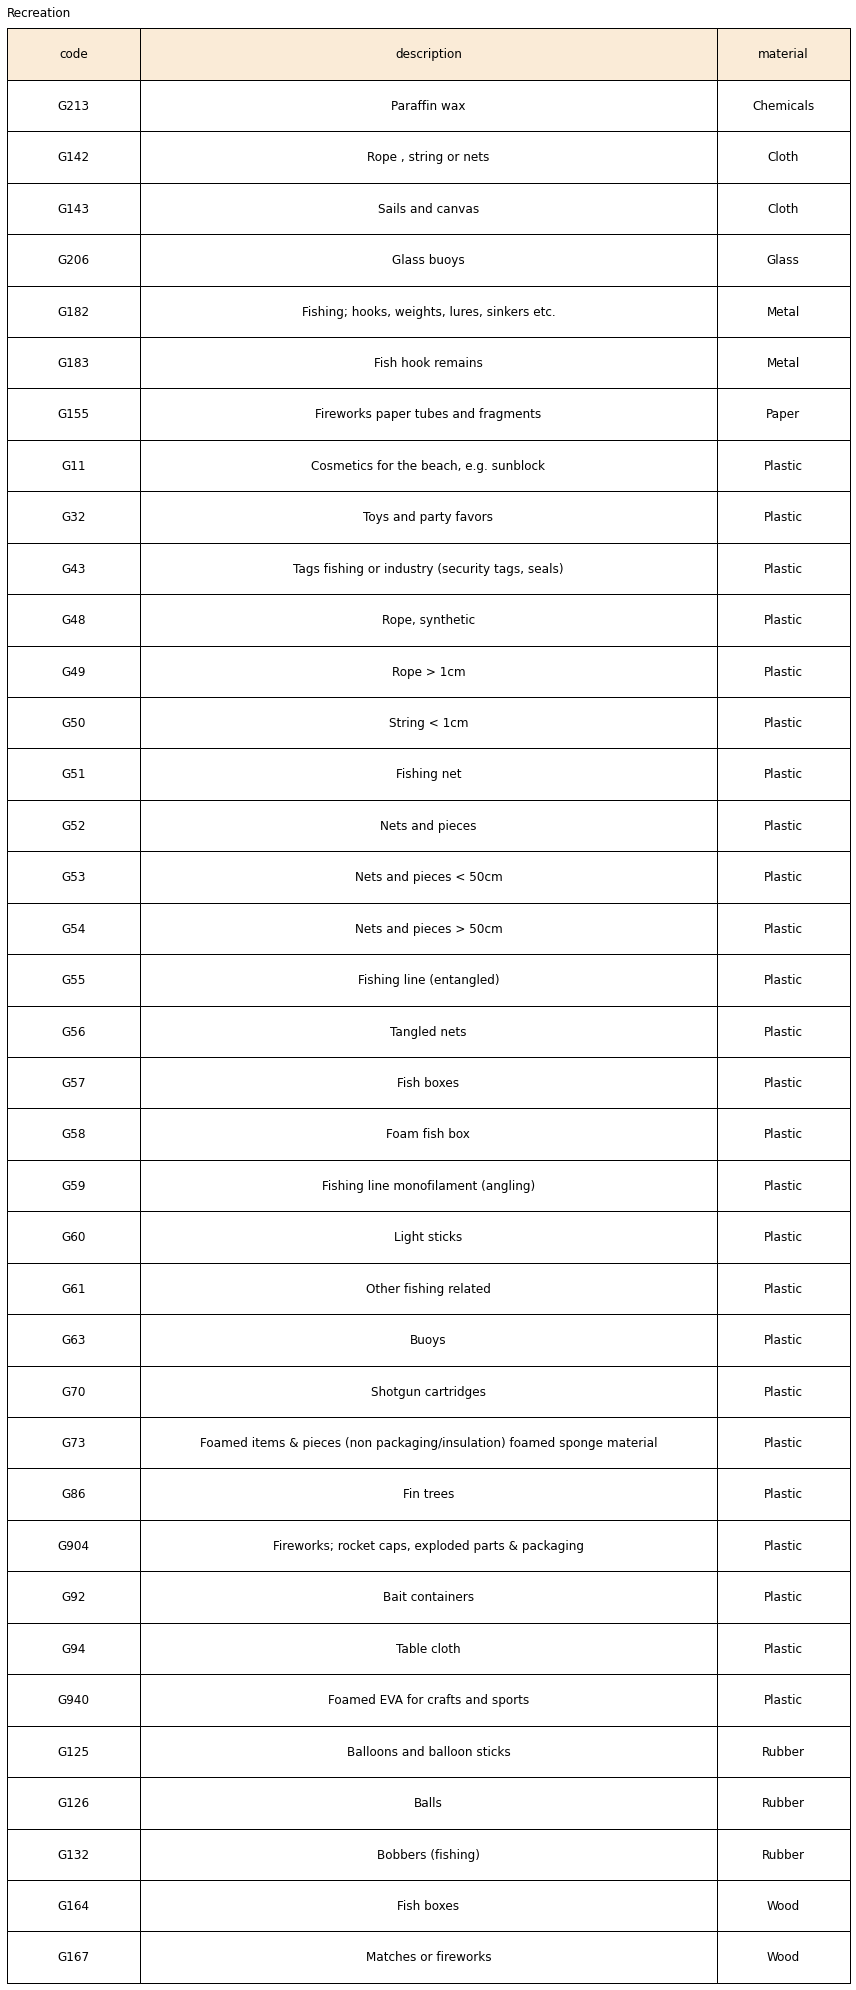

In [15]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(recreation)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Recreation", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Fishing, hunting, boating and beach related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Food and drink codes</span>
Includes all materials related to eating and drinking. The greatest quantities are single use plastics (SUP) items related to  outdoor or to go consumption. The most prevalent SUP are packaging for candy and snacks items (G30).

In [16]:
foodstuff = [
    'G1',
    'G8',
    'G7',
    'G10',
    'G21',
    'G24',
    'G30',
    'G151',
    'G175',
    'G176',
    'G177',
    'G178',
    'G179',
    'G181',
    'G200',
    'G201',
    'G203',
    'G150',
    'G153',
    'G159',
    'G165',
    'G31',
    'G33',
    'G34',
    'G35',
    'G906',
    'G907',
    'G926',
    'G938'
    ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/foodstuff.json", data=foodstuff)
grouped = grouped + foodstuff
# groups.append({"food":foodstuff})
groups.update({x:"food" for x in foodstuff})

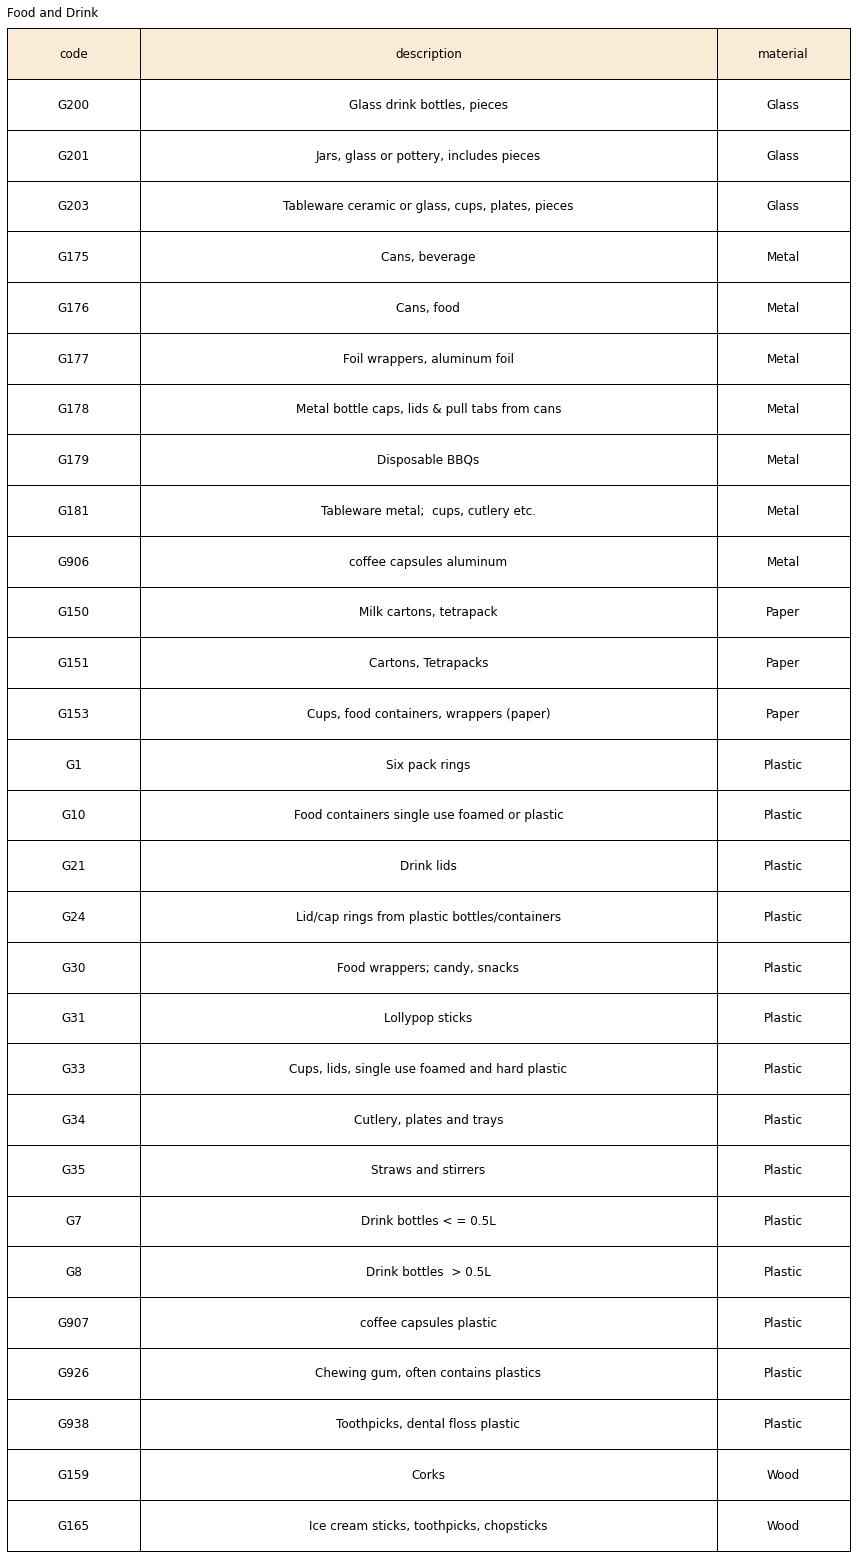

In [17]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(foodstuff)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Food and Drink", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Food and drink related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Agriculture codes</span>
Agriculture for grouping analysis is the production for commercial purposes of crops, livestock, livestock products, forest crops, nursery and greenhouse products.

In [18]:
ag2 = [
    "G36",
    "G936",
    "G937",
    "G13",
    "G18", 
    "G41",
    "G65",
    "G67",
    "G90",
    "G140",
    "G161",
    "G168",
    "G170",
    "G171",
    "G172",
    "G191",
    "G192",
    "G934",
    "G943"
]
# saving to .json
push_this_to_json(filename=F"{project_directory}/ag2.json", data=ag2)
grouped = grouped + ag2
# groups.append({"ag2":ag2})
groups.update({x:"ag2" for x in ag2})

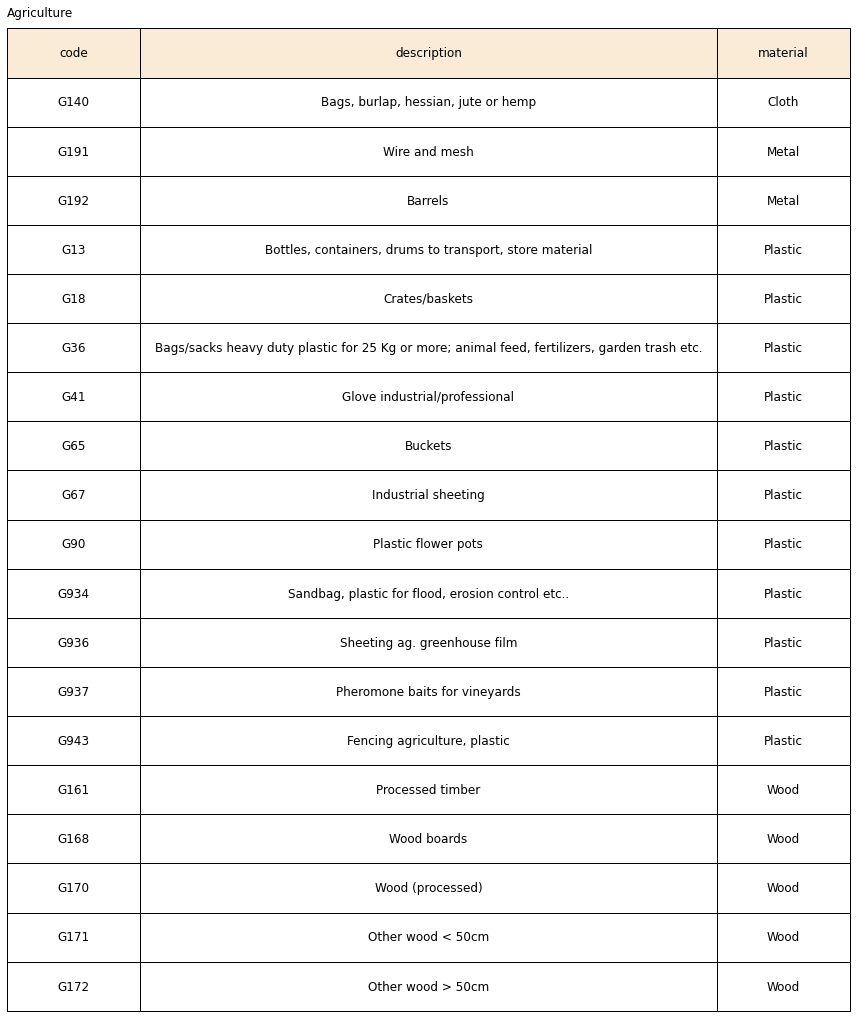

In [19]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(ag2)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Agriculture", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Agriculture"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Infrastructure codes</span>
Infrastructure relates to all forms of construction, renovations and maintenance of public and private structures including roads, bridges and ports as well as power and water supplies. Codes G909-G912 were created to differentiate foams used for insulation from packaging foams. The data is aggregated to parent codes G74, G81 and G82.

In [20]:

construction2= [
            'G9',
            'G204',
            'G187',
            'G919',
            'G65',
            'G17',
            'G22',
            'G66',
            'G68',
            'G69',
            'G72',
            'G74',
            'G81',
            'G82',
            'G83',
            'G87',
            'G89',
            'G93',
            'G160',
            'G162',
            'G166',
            'G169',
            'G174',
            'G186',
            'G188',
            'G189',
            'G190',
            'G194',
            'G197',
            'G198',
            'G199',
            'G214',
            'G908',
            'G909',
            'G910',
            'G911',
            'G912',
            'G921',
            'G927',
            'G931'
]
# saving to .json
push_this_to_json(filename=F"{project_directory}/construction2.json", data=construction2)
grouped = grouped + construction2
groups.update({x:"construction2" for x in construction2})

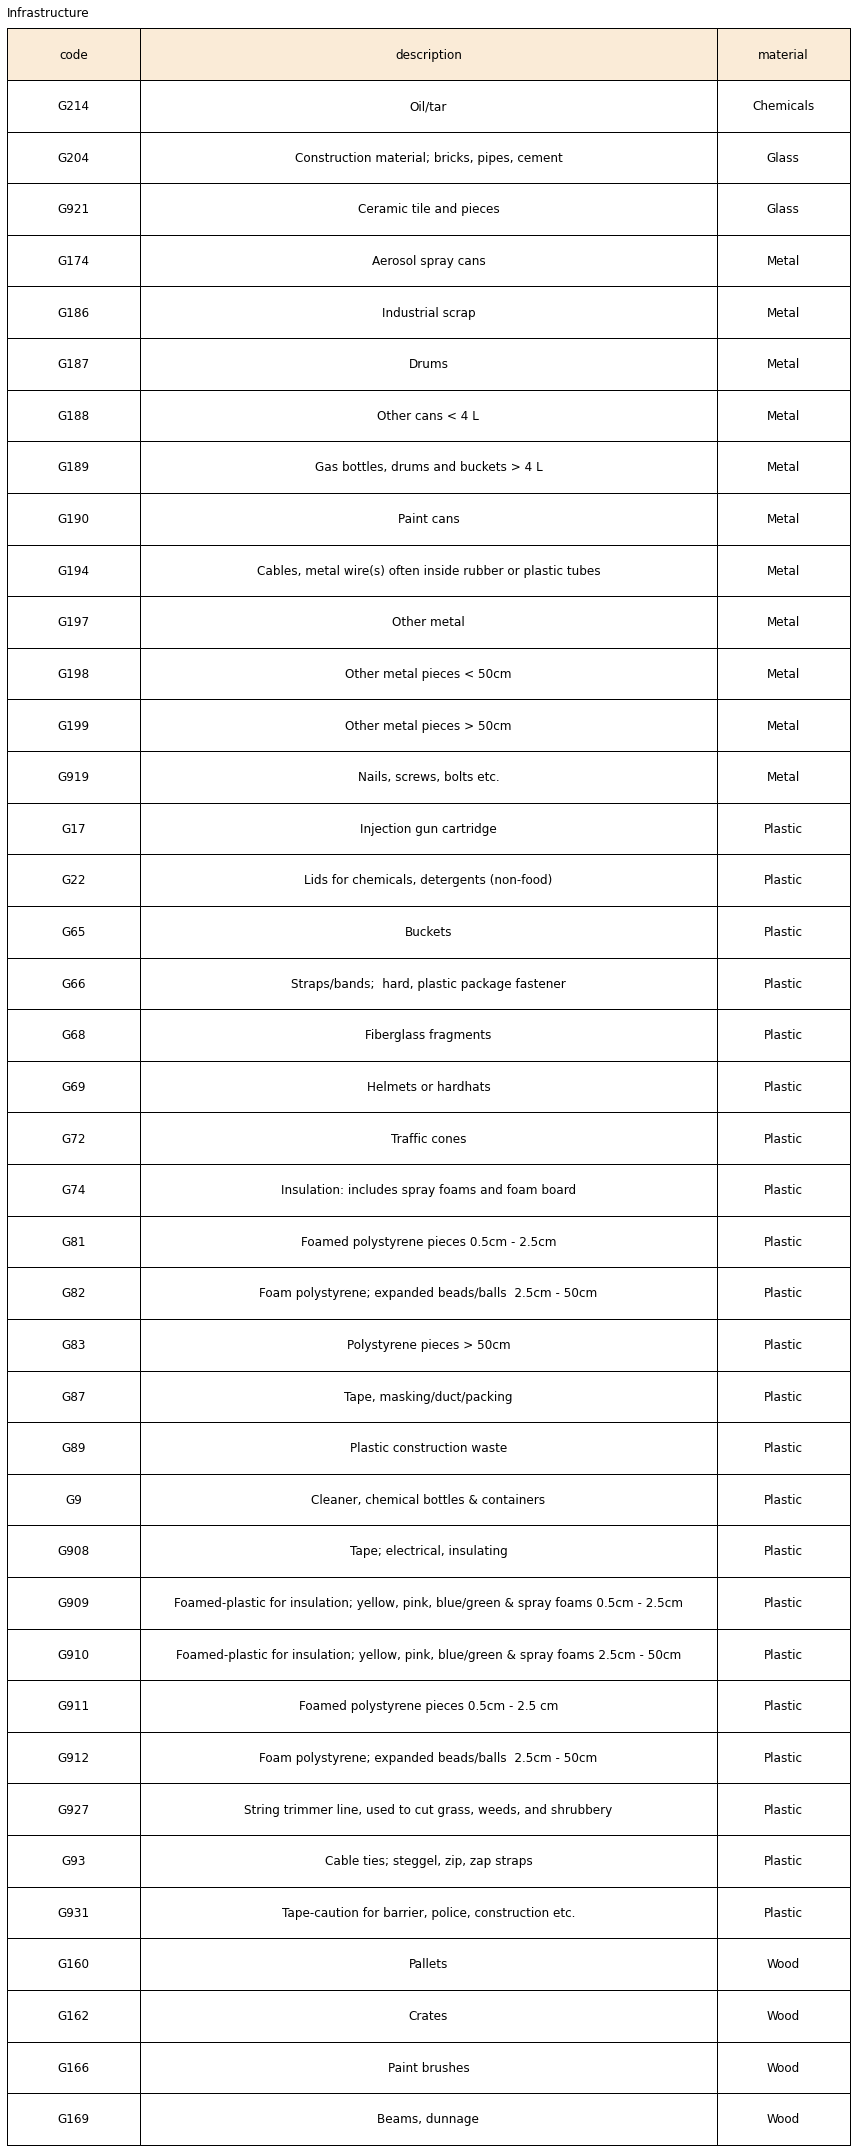

In [21]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(construction2)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Infrastructure", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items related to construction industry"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Tobacco codes</span>
All tobacco related items.

In [22]:
tobac = [
    'G25',
    'G26',
    'G27',
    'G152'
    ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/tobac.json", data=tobac)
grouped = grouped + tobac

groups.update({x:"tobaco" for x in tobac})

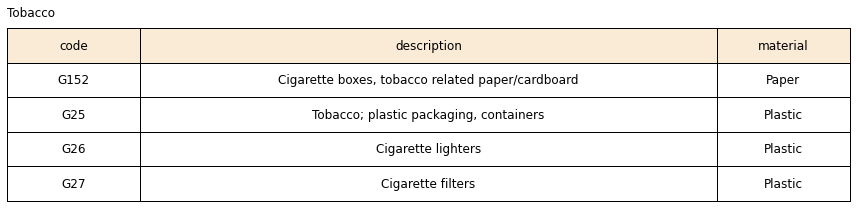

In [23]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(tobac)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Tobacco", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Tobacco related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Personal Items</span>

Personal effects likely left on site or close proximity.

In [24]:
pi = [
    'G211',
    'G84',
    'G99',
    'G101',
    'G102',
    'G127',
    'G131',
    'G135',
    'G136',
    'G137',
    'G138',
    'G139',
    'G37',
    'G39',
    'G40',
    'G145',
    'G28',
    'G29',
    'G154',
    'G195',
    'G900',
    'G901',
    'G902',
    'G903',
    'G905',
    'G913',
    'G914',
    'G915',
    'G918',
    'G916',
    'G933',
    'G929',
    'G939',
    'G945',
    'G923',
    'G928',
    'G12',
    'G71',
    'G88',
    'G935',
    'G930'
    ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/pi.json", data=pi)
grouped = grouped + pi
# groups.append({"pi":pi})
groups.update({x:"pi" for x in pi})


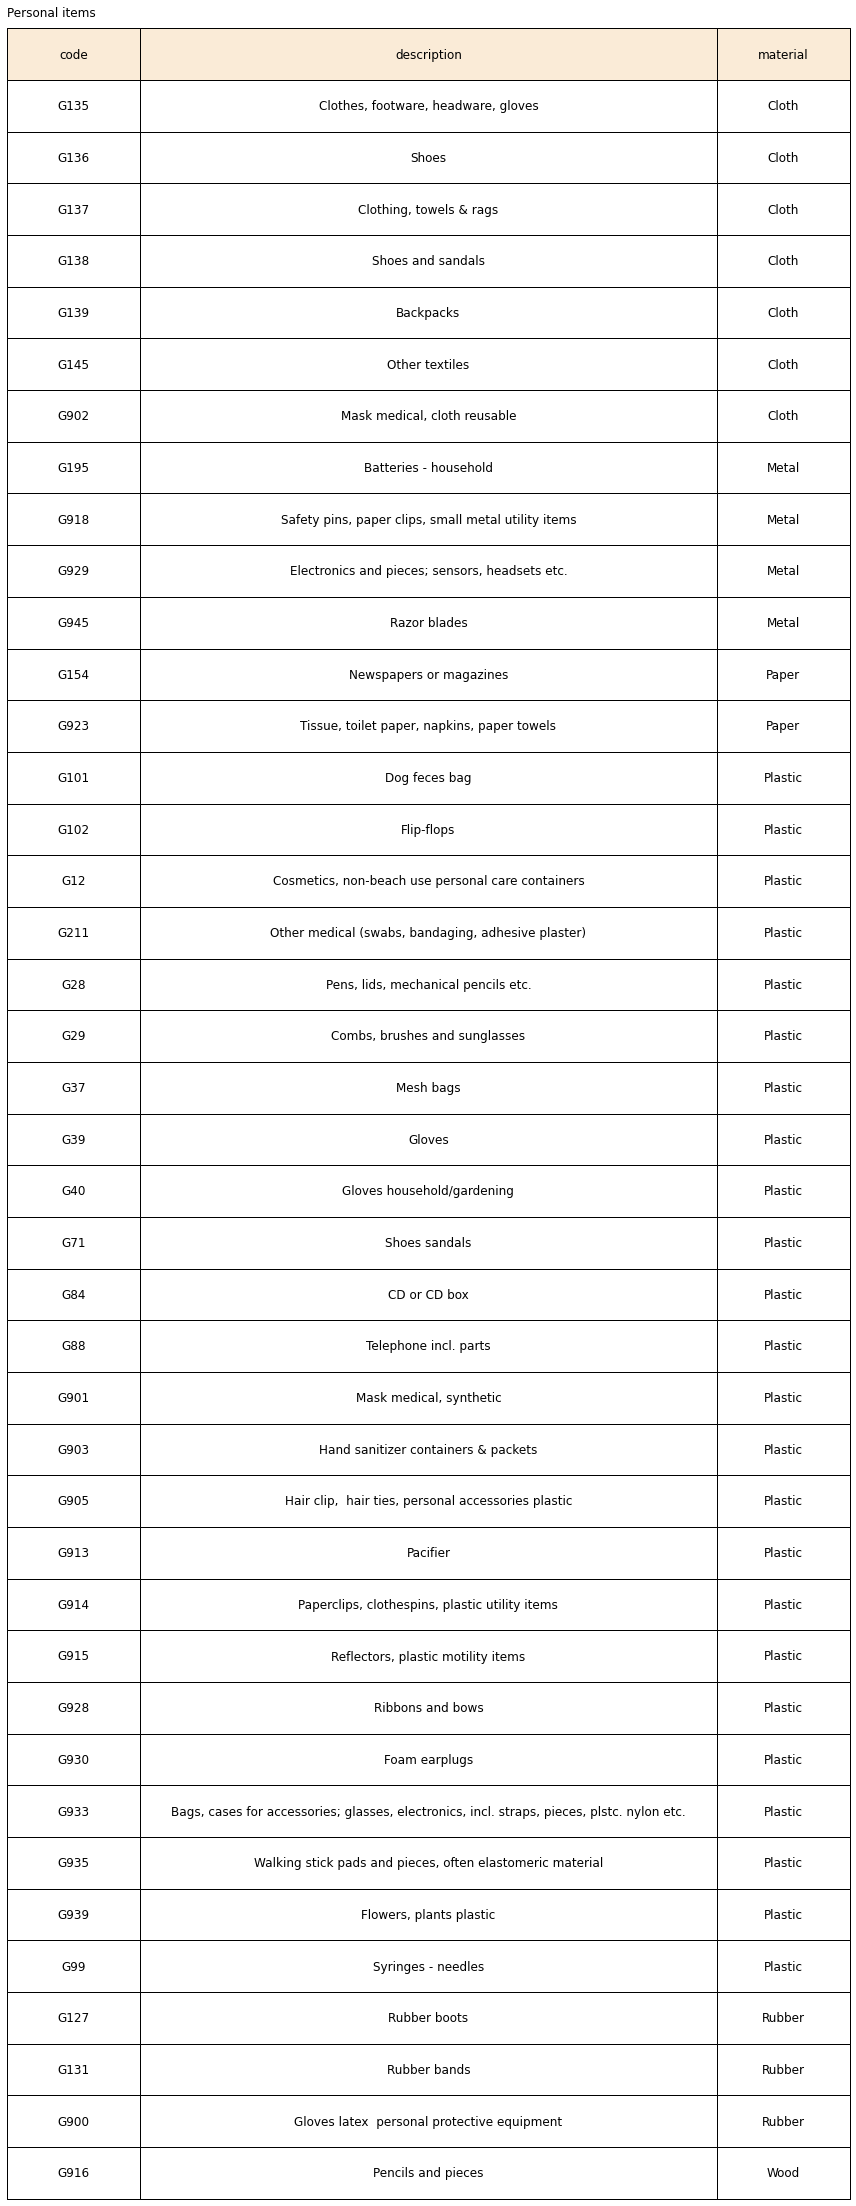

In [25]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(pi)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Personal items", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Personal use related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Packaging not related to food, drink, tobacco or unknown origin.</span>
All  packaging or wrapping material including paper, plastic and metal not identified as food, drink nor tobacco related. The packaging non food/drink group includes (G941) a code added  to differentiate thin packaging films from thicker industrial sheeting. The plastic packaging films (G941) are classified as non food, drink, nor tobacco related. Commonly the films are highly deteriorated and fragmented making the original use and source difficult to determine.


In [26]:
packaging = [
    "G23",
    "G2",
    "G146",
    "G148",
    "G149", 
    "G3", 
    "G20",
    "G4",
    "G6",
    "G147",
    "G922",
    "G941",
    "G156",
    "G157",
    "G158",
    "G925",
    "G5"
    ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/packaging.json", data=packaging)
grouped = grouped + packaging
# groups.append({"packaging":packaging})
groups.update({x:"packaging" for x in packaging})

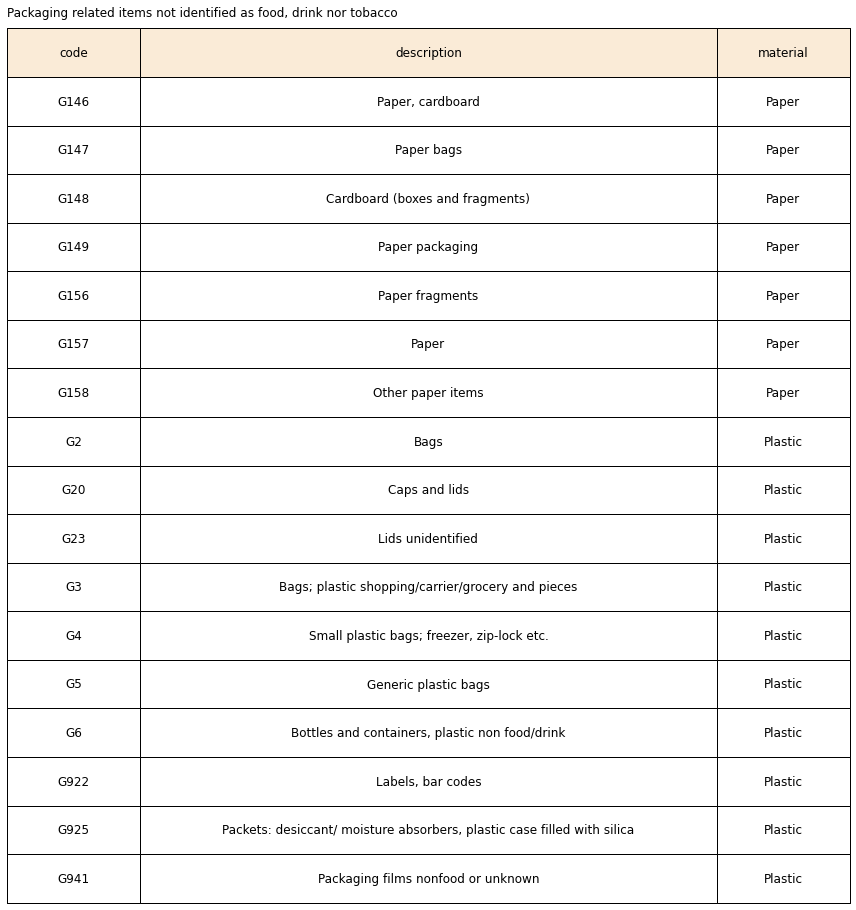

In [27]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(packaging)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Packaging related items not identified as food, drink nor tobacco", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Packaging related items not identified as food, drink or tobacco"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Plastic and foam pieces of unknown origin</span>
Plastic fragments group (Gfrags for analysis) are all plastic or  foam/plastic composite pieces greater than 0.5 cm of which the original use and source is undetermined. Plastic pieces found along Swiss shorelines are predominately small, hard, highly fragmented pieces of a pigmented item. The individual plastic pieces were quantified by material and size:



In [28]:
plasticpcs = [
    "G78",
    "G79",
    "G80",
    "G75", 
    "G76", 
    "G77" 
    ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/plasticpcs.json", data=plasticpcs)
grouped = grouped + plasticpcs
# groups.append({"plasticpcs":plasticpcs})
groups.update({x:"plasticpcs" for x in plasticpcs})

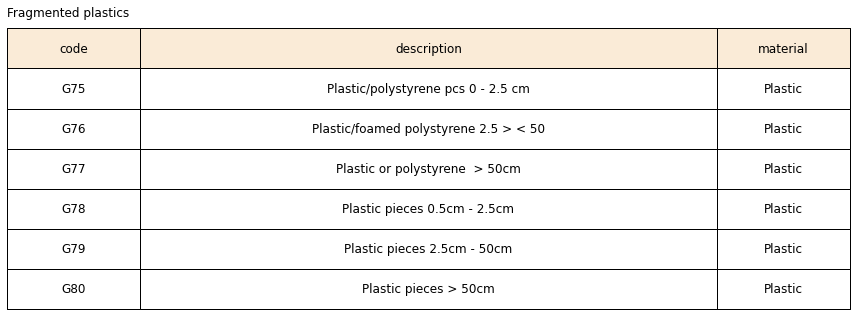

In [29]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(plasticpcs)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Fragmented plastics", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Plastic fragments of unknown use of origin"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

In [30]:
### <span style="color:#008891">Recreation codes</span>
print("\ncodes grouped:\n")
print(grouped)
print("\ncodes not grouped:\n")
print(dfCodes[~dfCodes.code.isin(grouped)].code.values)
print("\ncodes not grouped abrev list:\n")


codes grouped:

['G112', 'G106', 'G117', 'G103', 'G104', 'G105', 'G107', 'G108', 'G109', 'G110', 'G111', 'G113', 'G114', 'G115', 'G116', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G91', 'G95', 'G96', 'G98', 'G97', 'G100', 'G133', 'G932', 'G144', 'G32', 'G43', 'G48', 'G49', 'G50', 'G49', 'G51', 'G52', 'G53', 'G54', 'G53', 'G55', 'G56', 'G57', 'G58', 'G59', 'G60', 'G61', 'G63', 'G70', 'G73', 'G86', 'G92', 'G94', 'G206', 'G132', 'G142', 'G143', 'G155', 'G164', 'G167', 'G182', 'G183', 'G125', 'G126', 'G11', 'G213', 'G904', 'G940', 'G1', 'G8', 'G7', 'G10', 'G21', 'G24', 'G30', 'G151', 'G175', 'G176', 'G177', 'G178', 'G179', 'G181', 'G200', 'G201', 'G203', 'G150', 'G153', 'G159', 'G165', 'G31', 'G33', 'G34', 'G35', 'G906', 'G907', 'G926', 'G938', 'G36', 'G936', 'G937', 'G13', 'G18', 'G41', 'G65', 'G67', 'G90', 'G140', 'G161', 'G168', 'G170', 'G171', 'G172', 'G191', 'G192', 'G934', 'G943', 'G9', 'G204', 'G187', 'G919', 'G65', 'G17', 'G22', 'G66', 'G68', 'G69', 'G72', 'G74', 'G81', 'G82

In [31]:
ng=dfCodes[~dfCodes.code.isin(grouped)]

figname = F"workinglist.csv"
filename=F"{output}/code_groups/{figname}"
ng.to_csv(filename, index=None) 

In [32]:
ng.code.unique()


array(['G212', 'G141', 'G202', 'G205', 'G207', 'G208', 'G209', 'G210',
       'G917', 'G180', 'G184', 'G185', 'G193', 'G196', 'G124', 'G14',
       'G15', 'G16', 'G19', 'G38', 'G42', 'G44', 'G45', 'G46', 'G47',
       'G62', 'G64', 'G700', 'G85', 'G942', 'G944', 'G128', 'G129',
       'G130', 'G134', 'G998', 'G999', 'G163', 'G173', 'Gfrags', 'Gfoam'],
      dtype=object)

In [33]:

# saving to .json
push_this_to_json(filename=F"{project_directory}/nogroup.json", data=list(ng.code.unique()))

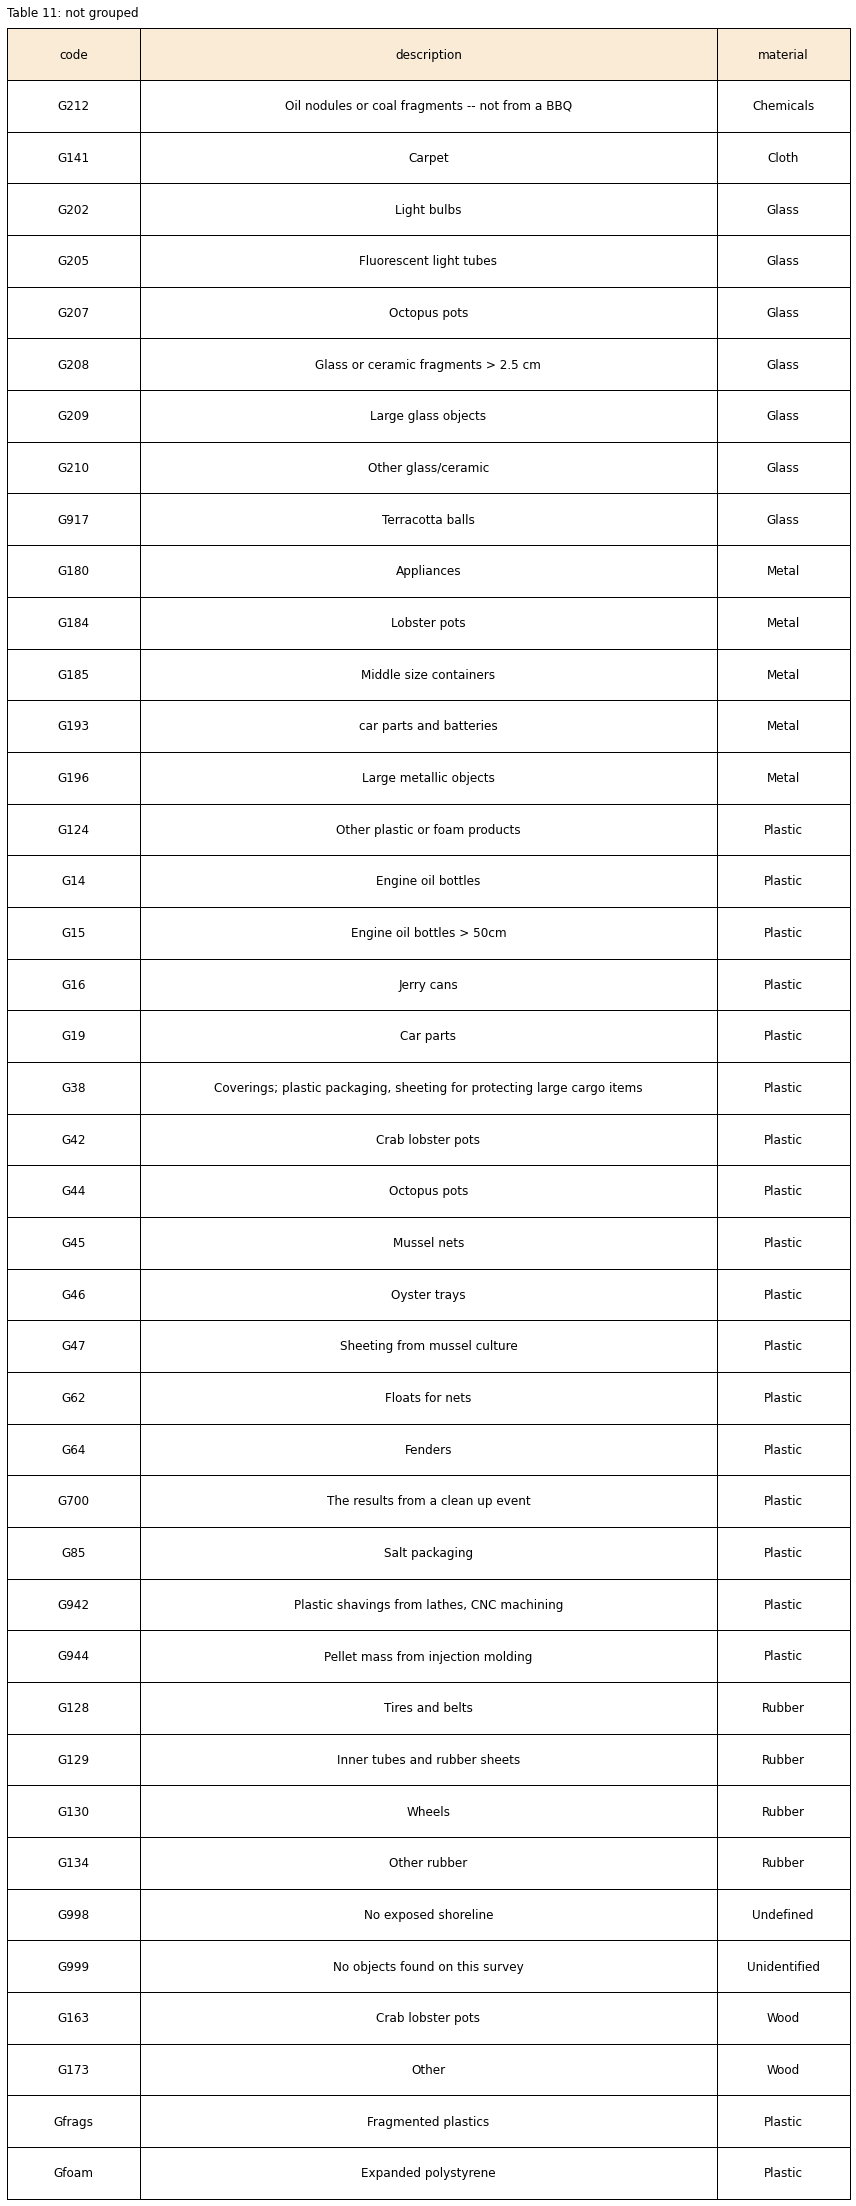

In [34]:
# make adjustments to table kwargs:
wwcodes = ng[['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: not grouped", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Ungrouped items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:blue">Codes no id</span>

In [35]:

hmm = dfAgg.copy()
hmm = hmm[["code","quantity"]].groupby("code", as_index=False).quantity.sum()

found = hmm[hmm.quantity > 0].code.unique()

ahh=[code for code in dfCodes.code if code not in found]


# saving to .json
push_this_to_json(filename=F"{project_directory}/codeNotfound.json", data=ahh)

# construction codes that have not been identified
[code for code in construction2 if code in ahh]

['G187', 'G69', 'G72', 'G169', 'G189', 'G909', 'G910', 'G911', 'G912']

In [36]:
dfCodes[dfCodes.code.isin(ahh)]


,code,material,description,source,source_two,source_three,parent_code,direct,single_use,micro,ospar_code,groupname
0,G212,Chemicals,Oil nodules or coal fragments -- not from a BBQ,Undefined,Where does it come from,none,Parent code,False,False,False,none,not classified
21,G206,Glass,Glass buoys,Fishing,Where does it come from,NaN,Parent code,True,False,False,NaN,recreation
24,G209,Glass,Large glass objects,Undefined,Where does it come from,NaN,Parent code,True,False,False,NaN,not classified
38,G184,Metal,Lobster pots,Fishing,Where does it come from,NaN,Parent code,True,False,False,NaN,not classified
41,G187,Metal,Drums,Packaging,Where does it come from,NaN,Parent code,True,False,False,NaN,infrastructure
43,G189,Metal,"Gas bottles, drums and buckets > 4 L",Packaging,Where does it come from,none,Parent code,True,False,False,none,infrastructure
46,G192,Metal,Barrels,Undefined,Where does it come from,NaN,Parent code,True,False,False,NaN,agriculture
86,G110,Plastic,Ovoid pellets < 5mm,Industry,Where does it come from,Indirect,Parent code,True,False,True,none,micro plastics (< 5mm)
97,G120,Plastic,Threadlike user plastic ( >1mm),Undefined,Where does it come from,NaN,Parent code,True,False,False,NaN,micro plastics (< 5mm)
98,G121,Plastic,Foamed user plastic ( >1mm),Undefined,Where does it come from,NaN,Parent code,True,False,False,NaN,micro plastics (< 5mm)


In [37]:
dfCodes['source_two'] = 'unk'

def assgin_a_group(x,groups):
    try:
        send = groups[x]
    except:
        send = 'unk'
    return send
    
    
for group in groups:
    dfCodes['source_two'] = dfCodes.code.map(lambda x: assgin_a_group(x,groups))
dfCodes.groupby('source_two').code.count()

source_two
ag2              18
construction2    40
food             29
micro            21
packaging        17
pi               41
plasticpcs        6
recre            37
tobaco            4
unk              41
waste_water       9
Name: code, dtype: int64

In [38]:
#transported = [*codesmicro, *wastewater, *ag2, *construction2]
# another way to make a list of grouped codes

#### Thanks for visiting

if not contact shannon@hammerdirt.ch

In [39]:
dfCodes[dfCodes.source_two == 'cons']
figname = F"codes_with_groups.csv"
filename=F"{output}/code_groups/{figname}"
dfCodes.to_csv(filename, index=None) 

In [40]:
author = "shannon@hammerdirt.ch"
my_message = "fun is outside"
print(F"\nProduced by: {author}\nDate: {today}\n\n{my_message}")


Produced by: shannon@hammerdirt.ch
Date: 2021-08-04

fun is outside
